In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

reading the Iris dataset (Iris.csv) 

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# check for null
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Identify independent variable x

In [4]:
X = data.iloc[:, 0:5]
X.shape

(150, 5)

Encode dependent variable y such that ‘Iris-setosa' is encoded as 0, and 'Iris-versicolour' and 'Iris-virginica' are both encoded as 1. (0 corresponds to the 'Iris-setosa' class, and 1 corresponds to the not-‘Iris-setosa' class.)

In [5]:
Y = data.iloc[:,5].values.reshape(-1, 1)
# Iris-versicolor not Iris-versicolour
Y[Y == 'Iris-versicolor'] = 1
Y[Y == 'Iris-virginica'] = 1
Y[Y == 'Iris-setosa'] = 0

Y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

Split the data into a training and test set.

In [6]:
# scale the data so that it is easier to fit
X = preprocessing.scale(X) 
# Train with the Answer to the Ultimate Question of Life
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
Y_train = np.array(Y_train).astype(int)

Use sklearn’s logistic regression function to fit a model and make predictions on the test set.

In [7]:
model = LogisticRegression()
model.fit(X_train, np.ravel(Y_train))

LogisticRegression()

That was some horrific gymnast. Where did I go wrong

In [8]:
predictions = model.predict(X_test)
predictions

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0])

Use sklearn to generate a confusion matrix, which compares the predicted labels to the actual labels (gold labels).

In [9]:
# more gymnast.
Y_test = np.array(Y_test).astype(int)
conf_matrix = confusion_matrix(np.ravel(Y_test), predictions)
conf_matrix

array([[19,  0],
       [ 0, 26]], dtype=int64)

In [10]:
the_one = pd.DataFrame(conf_matrix)
the_one

,0,1
0,19,0
1,0,26


The matrix shows that the model is has a accuracy with no false positives, or false negatives.(0 line up with 0 and 1 line up with 1)
I would expect a accuracy and precision to be close to 1

Analyse the confusion matrix and provide a prediction, in a comment, on whether the model is likely to have higher precision, higher recall, or similar precision and recall.

Code to calculate the accuracy, precision, and recall, and check whether your prediction was right.

In [11]:
print("Accuracy:", accuracy_score(np.ravel(Y_test), predictions))
print("Precision:", precision_score(np.ravel(Y_test), predictions))
print("Recall:", recall_score(np.ravel(Y_test), predictions))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


Now I know somthing is really wrong

I was not expecting them to be at 1.0

In [12]:
type(conf_matrix)

numpy.ndarray

In [13]:
def no_df(cls):
    class wrapper:
        def __init__(self, matrix):
            if not isinstance(matrix, np.ndarray):
                raise TypeError("I hate DF. Input must be a numpy.ndarray")
            self.obj = cls(matrix)

        def __getattr__(self, attr):
            return getattr(self.obj, attr)
            
    return wrapper

I was easier to wright and debug the above decorator that to anything with dataframes. In fact I treated myself to the challenge, after I had finished fighting with the below class. 

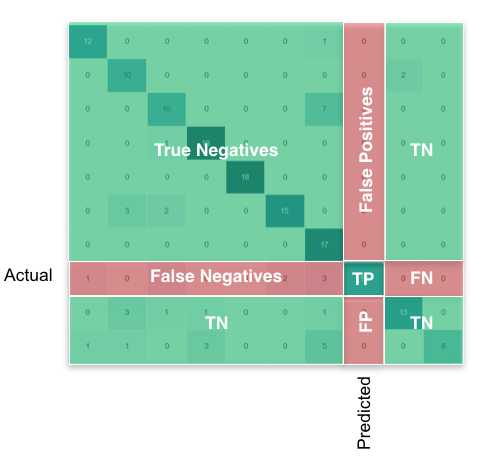

In [21]:
@no_df
class code_calculate:
    def __init__(self, matrix):
        '''
        self.sm = matrix.sum().astype(int)
        self.fp = (matrix.sum(axis=0) - np.diag(matrix))
        self.fn = (matrix.sum(axis=1) - np.diag(matrix))
        self.tp = np.diag(matrix)
        self.tn = matrix.sum() - (self.fp + self.fn + self.tp)
        '''
        # Well done stackoverflow. Note to self. I can fix this by adding a location for the TP
        self.fp = matrix[1][0]
        self.fn = matrix[0][1]
        self.tp = matrix[0][0]
        self.tn = matrix[1][1]
        
    def accuracy(self):
        return int((self.tp + self.tn)/(self.tp + self.tn + self.fp + self.fn))

    def precision(self):
        return int(self.tp/(self.tp + self.fp))

    def recall(self):
        return int(self.tp/(self.tp + self.fn))

    def f_one(self):
        return int(2 * (self.precision() * self.recall()) / (self.precision() + self.recall()))

write_your_code = code_calculate(conf_matrix)

In [22]:
print(f"Accuracy:  {write_your_code.accuracy()}")  # (1+1)/(1+1+0+0) = 0
print(f"Precision: {write_your_code.precision()}") # 1 / (1+0) = 1 
print(f"Recall:    {write_your_code.recall()}")    # 1 / (1+0) = 1 
print(f"F1:        {write_your_code.f_one()}")     # 1*1 = 1, 1+1 = 2, 1/2 *2 = 1

Accuracy:  1
Precision: 1
Recall:    1
F1:        1


(Optional). Due to the amount of time before I am expecting feed back on this work I have declined to do the optional. It will be better revisited once I know if doing the work correctly. 